In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pdfplumber
import os
import pandas as pd
from itertools import islice
import re
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS
from collections import Counter

In [ ]:
import spacy
nlp = spacy.load("pt_core_news_sm")

<table>
      <tr>
          <td bgcolor=#000000; width="1000px" ; height ="30">
          <center><font color=#FAEBD7 size=6.5>Analisando Plano de Governo dos Presidenciáveis</font></center>
          </td>
      </tr>
</table>

Em uma eleição, os candidatos a cargos políticos tentam atrair votos expondo suas ideias e propostas para melhorar a cidade, estado ou país que almejam governar. Uma das formas de expô-las ao público é pelo plano de governo, um documento já tradicional na política brasileira.



<table>
      <tr>
          <td bgcolor=#000000; width="1000px" ; height ="30">
          <center><font color=#FAEBD7 size=6.5>Planos de Governo - Tratamento</font></center>
          </td>
      </tr>
</table>

<p>O tratamento deve consistir em extrair os dados dos pdf de todas as paginas dos planos de governos dos 12 partidos separadamente. Posteriormente utilizar alguma tecnica para normalizar os dados para a análise, dentre essas tecnicas está a tokenização das palavras, utilização de regex para tratamento do texto e contabilização de frequência das palavras</p>
















# 1. Importando Propostas e Extraindo os textos

In [ ]:
pt = '/content/drive/MyDrive/Nlp/planos_governo/PlanoPT.pdf'
dc = "/content/drive/MyDrive/Nlp/planos_governo/Plano_DC.pdf"
mdb = "/content/drive/MyDrive/Nlp/planos_governo/Plano_MDB.pdf"
novo = "/content/drive/MyDrive/Nlp/planos_governo/Plano_NOVO.pdf"
pcb = "/content/drive/MyDrive/Nlp/planos_governo/Plano_PCB.pdf"
pdt = "/content/drive/MyDrive/Nlp/planos_governo/Plano_PDT.pdf"
pl = '/content/drive/MyDrive/Nlp/planos_governo/Plano_PL.pdf'
pstu = "/content/drive/MyDrive/Nlp/planos_governo/Plano_PSTU.pdf"
ptb = "/content/drive/MyDrive/Nlp/planos_governo/Plano_PTB.pdf"
pup = "/content/drive/MyDrive/Nlp/planos_governo/Plano_PUP.pdf"
uniaobr = "/content/drive/MyDrive/Nlp/planos_governo/Plano_UNIAOBR.pdf"
pros = "/content/drive/MyDrive/Nlp/planos_governo/plano_PROS.pdf"


In [ ]:
PartidoPT = pdfplumber.open(pt)

PropostaPT = ''
for page in PartidoPT.pages:
  PropostaPT=PropostaPT + page.extract_text()
  PropostaPT=PropostaPT + ' '

In [ ]:
PartidoDC = pdfplumber.open(dc)

PropostaDC = ''
for page in PartidoDC.pages:
  PropostaDC=PropostaDC + page.extract_text()
  PropostaDC=PropostaDC + ' '

In [ ]:
PartidoMDB = pdfplumber.open(mdb)

PropostaMDB = ''
for page in PartidoMDB.pages:
  PropostaMDB=PropostaMDB + page.extract_text()
  PropostaMDB=PropostaMDB + ' '

In [ ]:
PartidoNOVO = pdfplumber.open(novo)

PropostaNOVO = ''
for page in PartidoNOVO.pages:
  PropostaNOVO=PropostaNOVO + page.extract_text()
  PropostaNOVO=PropostaNOVO + ' '

In [ ]:
PartidoPCB = pdfplumber.open(pcb)

PropostaPCB = ''
for page in PartidoPCB.pages:
  PropostaPCB=PropostaNOVO + page.extract_text()
  PropostaPCB=PropostaPCB + ' '

In [ ]:
PartidoPDT= pdfplumber.open(pdt)

PropostaPDT = ''
for page in PartidoPDT.pages:
  PropostaPDT=PropostaPDT + page.extract_text()
  PropostaPDT=PropostaPDT + ' '

In [ ]:
PartidoPL= pdfplumber.open(pl)

PropostaPL = ''
for page in PartidoPL.pages:
  PropostaPL=PropostaPL + page.extract_text()
  PropostaPL=PropostaPL + ' '

In [ ]:
PartidoPSTU = pdfplumber.open(pstu)

PropostaPSTU = ''
for page in PartidoPSTU.pages:
  PropostaPSTU = PropostaPSTU + page.extract_text()
  PropostaPSTU = PropostaPSTU + ' '

In [ ]:
PartidoPTB = pdfplumber.open(ptb)

PropostaPTB = ''
for page in PartidoPTB.pages:
  PropostaPTB=PropostaPTB + page.extract_text()
  PropostaPTB=PropostaPTB + ' '

In [ ]:
PartidoPUP = pdfplumber.open(pup)

PropostaPUP = ''
for page in PartidoPUP.pages:
  PropostaPUP=PropostaPUP + page.extract_text()
  PropostaPUP=PropostaPUP + ' '

In [ ]:
Partidouniaobr = pdfplumber.open(uniaobr)

Propostauniaobr = ''
for page in Partidouniaobr.pages:
  Propostauniaobr=Propostauniaobr + page.extract_text()
  Propostauniaobr=Propostauniaobr + ' '

In [ ]:
PartidoPROS = pdfplumber.open(pros)

PropostaPROS= ''
for page in PartidoPROS.pages:
  PropostaPROS=PropostaPROS + page.extract_text()
  PropostaPROS=PropostaPROS + ' '

# 2. Partido dos Trabalhadores

## 2.1 Tratando o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPT = PropostaPT.lower()

In [ ]:
# Elminiação dos números
PropostaPT = re.sub(r'\d','', PropostaPT)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens_pt =re.findall( regex_token,PropostaPT)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos_pt =[]
for item in tokens_pt:
  if item not in stopwords:
    tokens_limpos_pt.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos_pt = Counter(tokens_limpos_pt)
sorted_pt = stats_tokens_limpos_pt.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens_pt = [word[0] for word in sorted_pt[0:29]]
freq_tokens_pt = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# bigramas()
bigrams_pt = [*map(' '.join, zip(tokens_limpos_pt, islice(tokens_limpos_pt, 2, None)))]

In [ ]:
#Os 30 bigramas mais frequentes
stats_bigrams_pt = Counter(bigrams_pt)
stats_bigrams_pt = stats_bigrams_pt.most_common(30)

In [ ]:
# O quantitativo dos bigramas
words_tokens_pt_big = [word[0] for word in stats_bigrams_pt[0:29]]
freq_tokens_pt_big = [word[1] for word in stats_bigrams_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokens = " ".join(s for s in stats_tokens_limpos_pt)
all_tokens = " ".join(s for s in bigrams_pt)

## 2.2. Análise

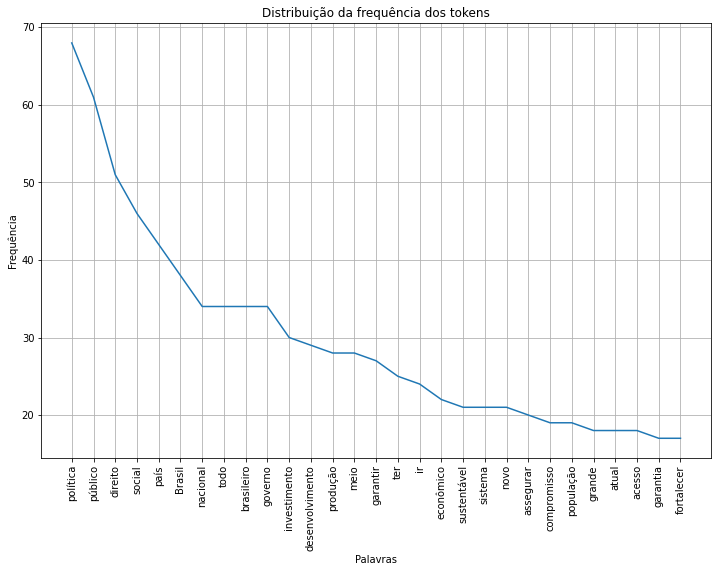

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens_pt, freq_tokens_pt)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

In [ ]:
stats_bigrams_pt

[('todo brasileira', 5),
 ('política direito', 5),
 ('economia economia', 4),
 ('fortalecer nacional', 4),
 ('ciência inovação', 4),
 ('coligação Esperança', 3),
 ('reconstrução país', 3),
 ('público fundamental', 3),
 ('padrão consumo', 3),
 ('transição energético', 3),
 ('reindustrialização novo', 3),
 ('fortalecimento público', 3),
 ('país novo', 3),
 ('programa transformação', 2),
 ('reconstrução Brasil', 2),
 ('amplo nacional', 2),
 ('justo sustentável', 2),
 ('solidário soberano', 2),
 ('sustentável criativo', 2),
 ('todo social', 2),
 ('social econômico', 2),
 ('democracia desenvolvimento', 2),
 ('país Brasil', 2),
 ('população quilombola', 2),
 ('povo tradicional', 2),
 ('primeiro governo', 2),
 ('execução público', 2),
 ('garantir ampliação', 2),
 ('fundamental crescimento', 2),
 ('compromisso social', 2)]

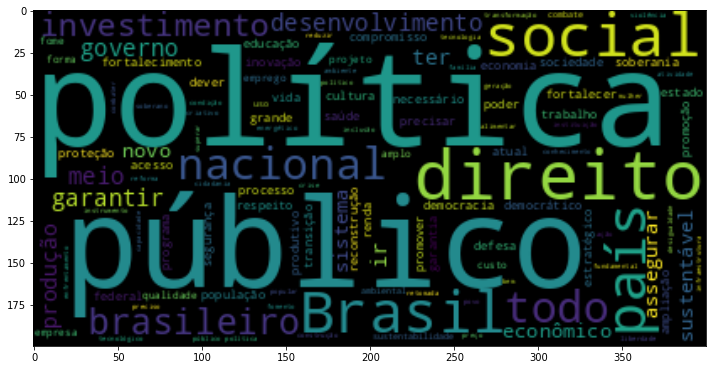

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokens)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 3. Democracia Cristã

## 3.1. Tratando o texto

In [ ]:
# Transformação em tudo lowercase
PropostaDC = PropostaDC.lower()

In [ ]:
# Elminiação dos números
PropostaDC = re.sub(r'\d','', PropostaDC)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens_dc =re.findall( regex_token, PropostaDC)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos_dc =[]
for item in tokens_dc:
  if item not in stopwords:
    tokens_limpos_dc.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos_pt)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
all_tokensdc = " ".join(s for s in stats_tokens_limpos)

## 3.2. Análise

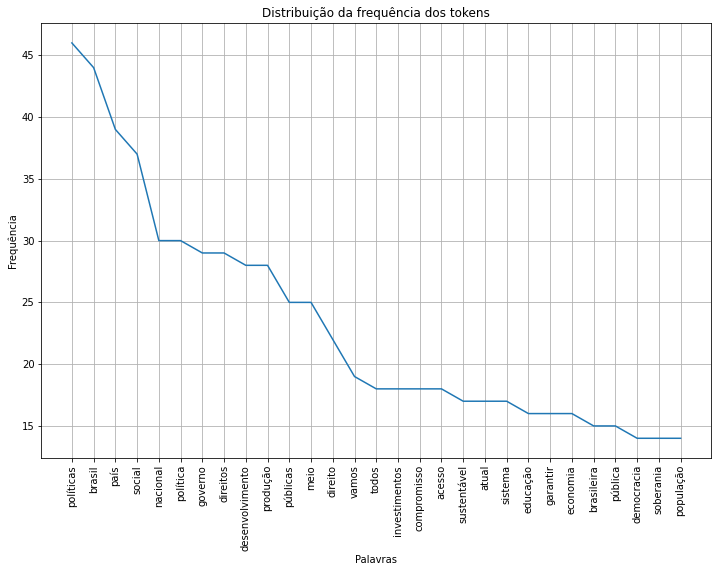

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

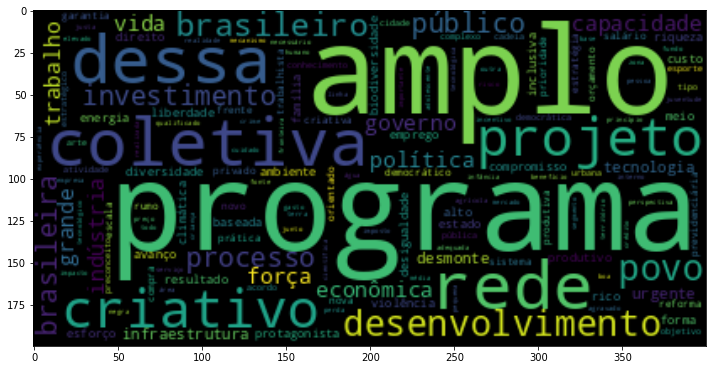

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensdc)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 4. Movimento Democrático Brasileiro

## 4.1 Tratando o texto

In [ ]:
# Transformação em tudo lowercase
PropostaMDB = PropostaMDB.lower()

In [ ]:
# Elminiação dos números
PropostaMDB = re.sub(r'\d','', PropostaMDB)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaMDB)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos_pt)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensMDB = " ".join(s for s in stats_tokens_limpos)

## 4.2. Análise

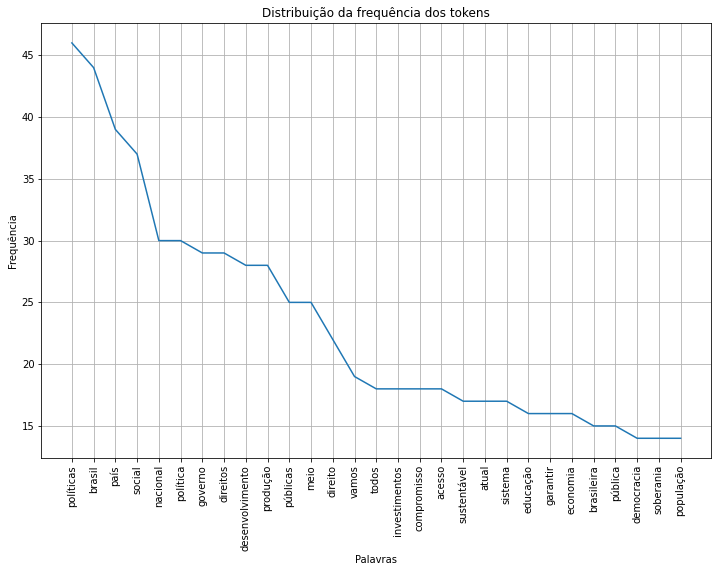

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

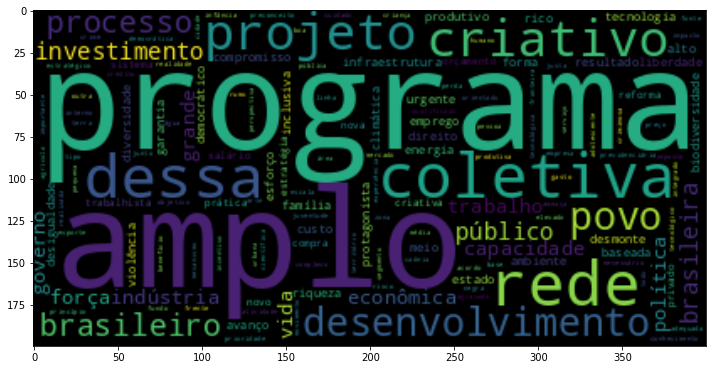

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensMDB)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 5. Partido Novo

## 5.1. Tratando o texto

In [ ]:
# Transformação em tudo lowercase
PropostaNOVO = PropostaNOVO.lower()

In [ ]:
# Elminiação dos números
PropostaNOVO = re.sub(r'\d','', PropostaNOVO)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaNOVO)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras
all_tokensNOVO = " ".join(s for s in stats_tokens_limpos)

## 5.2. Análise

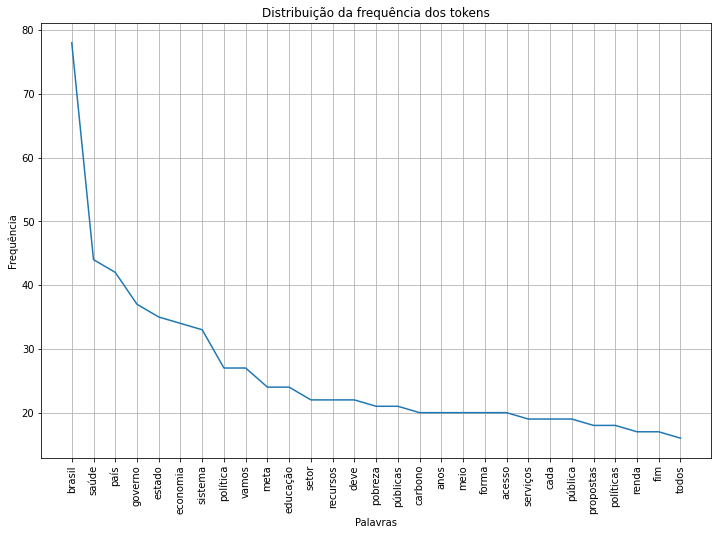

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

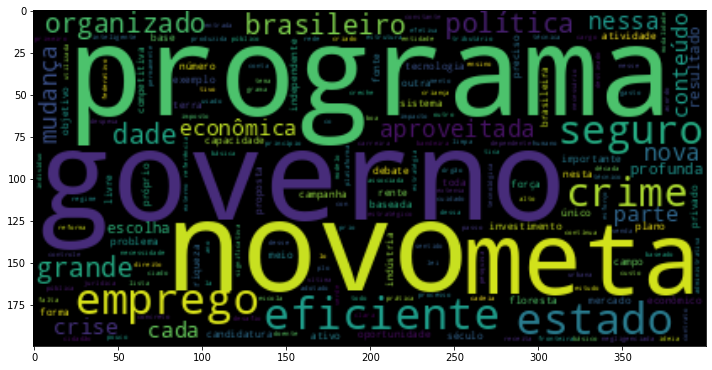

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensNOVO)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 6. Partido Comunista Brasileiro

## 6.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPCB = PropostaPCB.lower()

In [ ]:
# Elminiação dos números
PropostaPCB = re.sub(r'\d','', PropostaPCB)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaPCB)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensPCB = " ".join(s for s in stats_tokens_limpos)

## 6.2 Análise

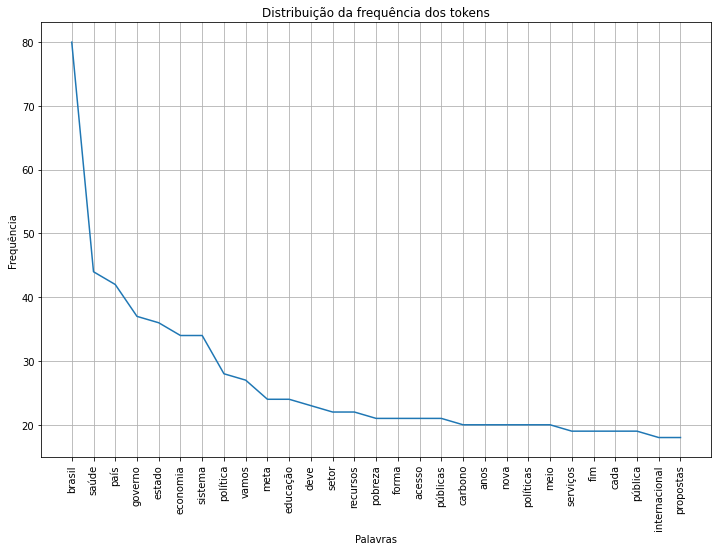

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

O partido novo se  tem um viés, obviamente, religioso que é confirmado em sua proposta de governo com "república cristã" e "autoria cristã" tendo aparecido 2 vezes. 

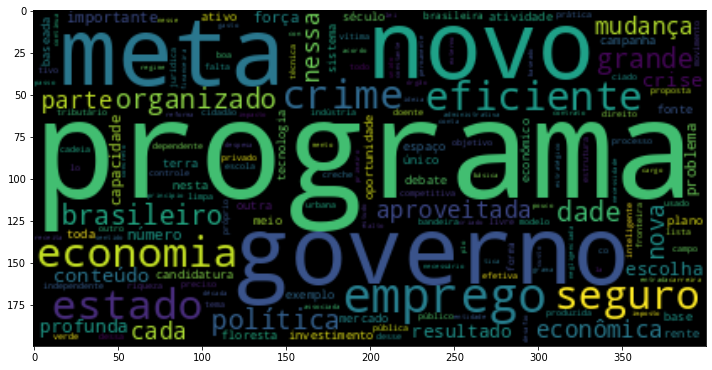

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensPCB)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 7. Partido Liberal

## 7.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPL = PropostaPL.lower()

In [ ]:
# Elminiação dos números
PropostaPL = re.sub(r'\d','', PropostaPL)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaPL)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensPL = " ".join(s for s in stats_tokens_limpos)

## 7.2 Análise

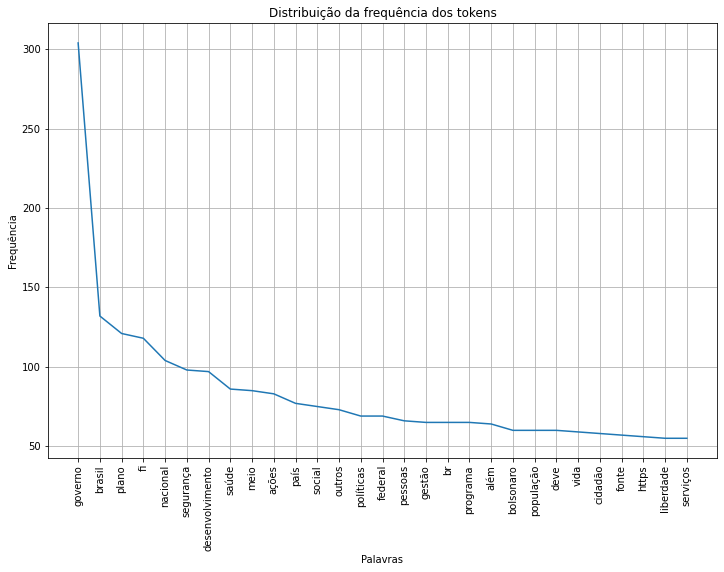

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

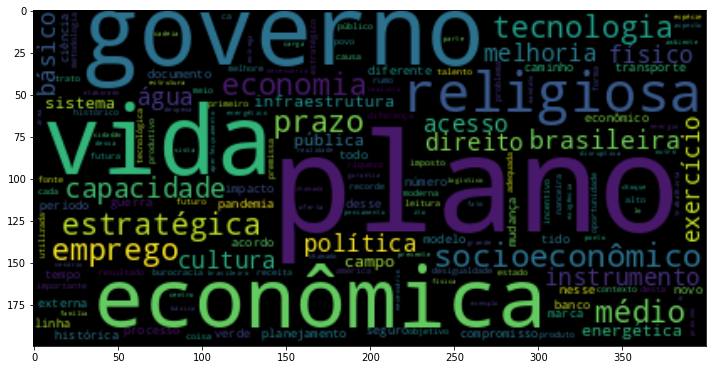

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensPL)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 8. Partido Socialista dos Trabalhadores Unificado

## 8.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPSTU = PropostaPSTU.lower()

In [ ]:
# Elminiação dos números
PropostaPSTU = re.sub(r'\d','', PropostaPSTU)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaPSTU)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensPSTU = " ".join(s for s in stats_tokens_limpos)

## 8.2 Análise

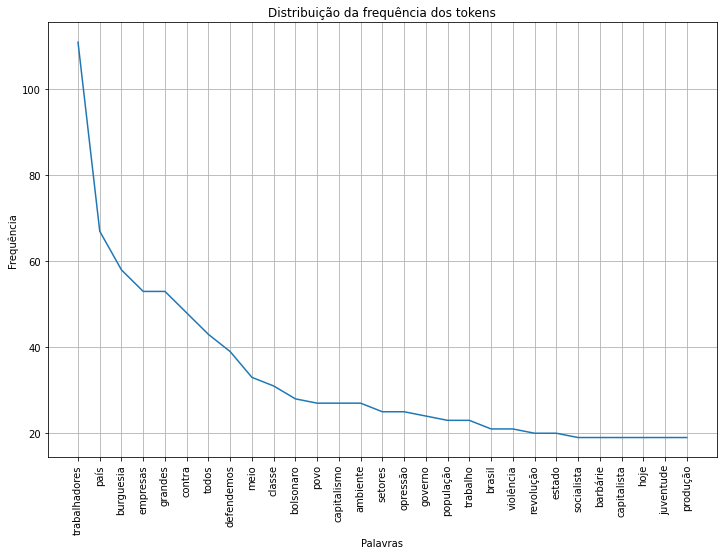

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

O partido novo se  tem um viés, obviamente, religioso que é confirmado em sua proposta de governo com "república cristã" e "autoria cristã" tendo aparecido 2 vezes. 

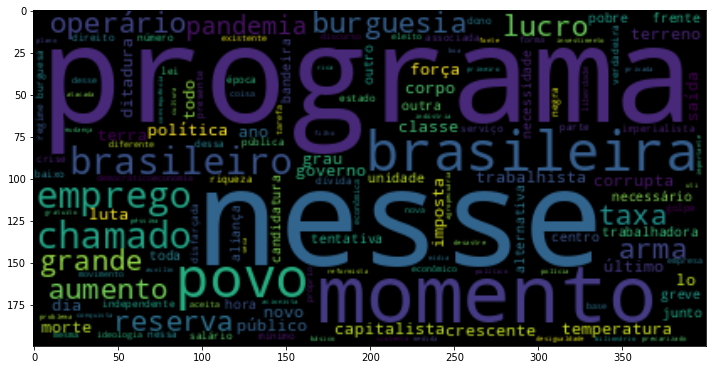

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensPSTU)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 9. Partido Trabalhista Brasileiro

## 9.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPTB = PropostaPTB.lower()

In [ ]:
# Elminiação dos números
PropostaPTB = re.sub(r'\d','', PropostaPTB)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaPTB)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensPTB = " ".join(s for s in stats_tokens_limpos)

## 9.2 Análise

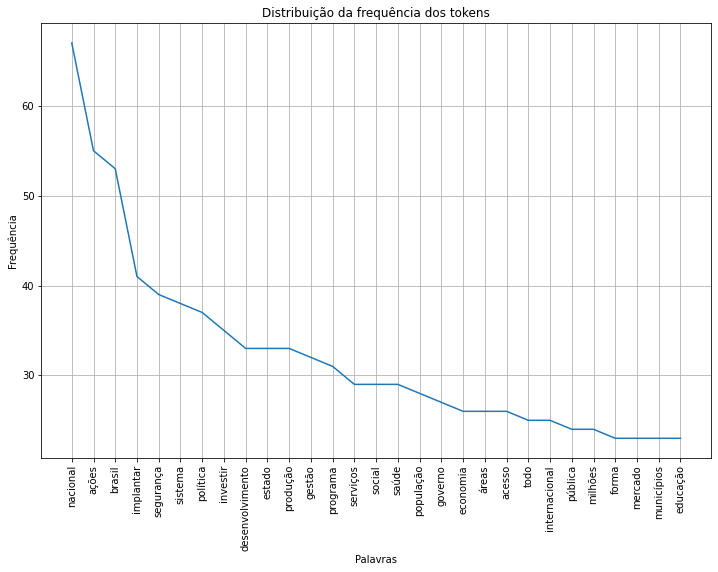

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

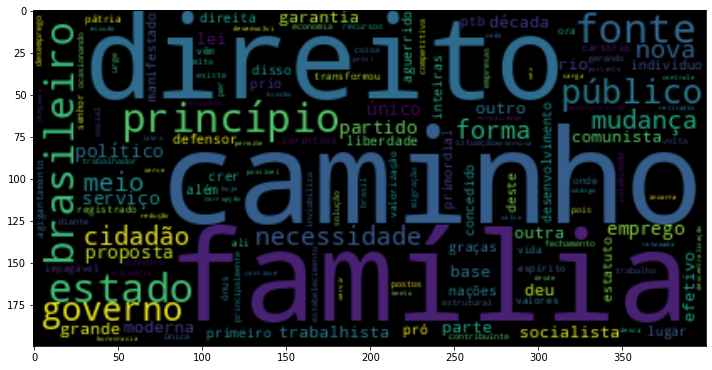

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensPTB)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 10. Partido de Unidade Popular

## 10.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPUP = PropostaPUP.lower()

In [ ]:
# Elminiação dos números
PropostaPUP = re.sub(r'\d','', PropostaPUP)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaPUP)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensPUP = " ".join(s for s in stats_tokens_limpos)

## 10.2 Análise

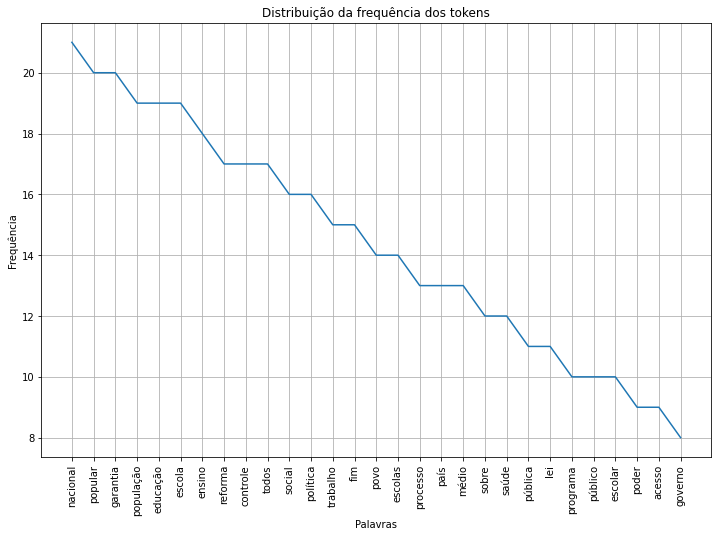

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

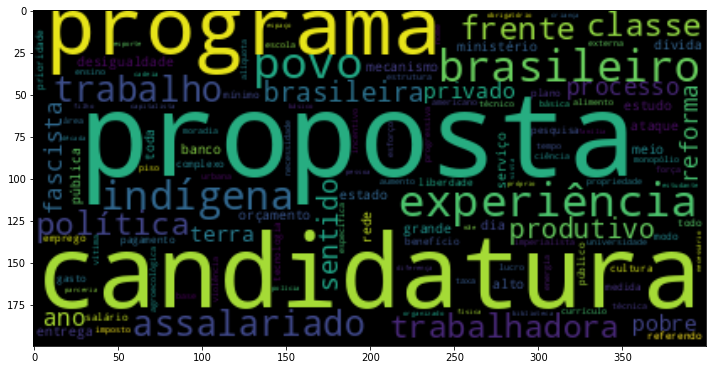

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensPUP)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 11. União Brasil

## 11.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
Propostauniaobr = Propostauniaobr.lower()

In [ ]:
# Elminiação dos números
Propostauniaobr = re.sub(r'\d','', Propostauniaobr)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, Propostauniaobr)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensuniaobr = " ".join(s for s in stats_tokens_limpos)

## 11.2 Análise

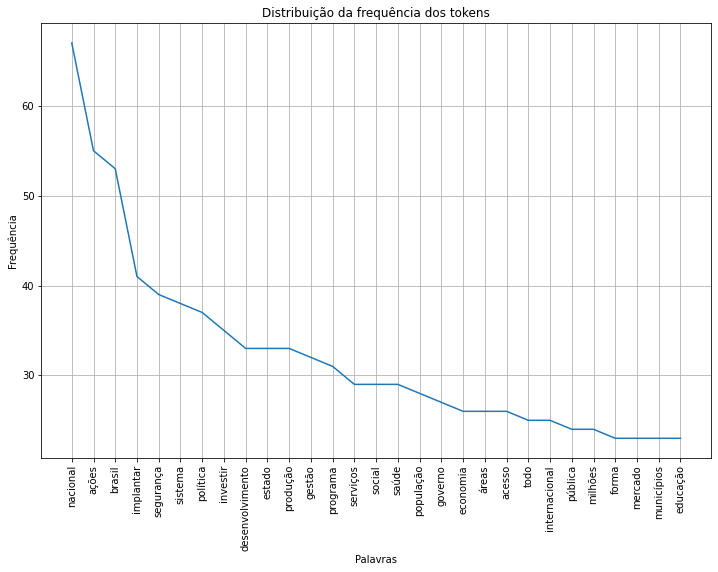

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

O partido novo se  tem um viés, obviamente, religioso que é confirmado em sua proposta de governo com "república cristã" e "autoria cristã" tendo aparecido 2 vezes. 

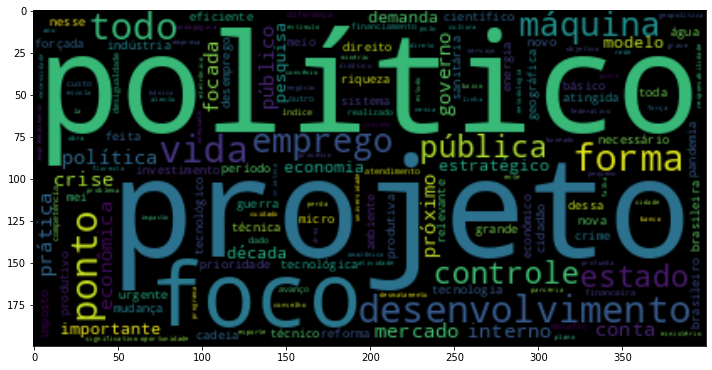

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensuniaobr)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

# 12. Partido Republicano da Ordem Social

## 12.1 Extraindo o texto

In [ ]:
# Transformação em tudo lowercase
PropostaPROS = PropostaPROS.lower()

In [ ]:
# Elminiação dos números
PropostaPROS = re.sub(r'\d','', PropostaPROS)

In [ ]:
# tokenizacao
regex_token='\w+'
tokens =re.findall(regex_token, PropostaPROS)

In [ ]:
# remoção stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
tokens_limpos =[]
for item in tokens:
  if item not in stopwords:
    tokens_limpos.append(item)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#As 30 palavras mais frequentes 
stats_tokens_limpos = Counter(tokens_limpos)
sorted_pt = stats_tokens_limpos.most_common(30)

In [ ]:
#As 30 palavras mais frequentes com o seu quantitativo
words_tokens = [word[0] for word in sorted_pt[0:29]]
freq_tokens = [word[1] for word in sorted_pt[0:29]]

In [ ]:
# concatenar as palavras e os bigramas
all_tokensPROS = " ".join(s for s in stats_tokens_limpos)

## 12.2 Análise

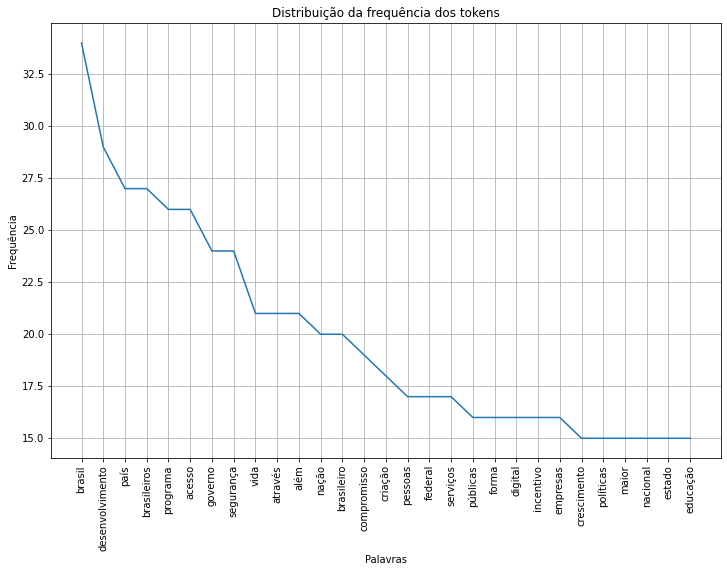

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(words_tokens, freq_tokens)

ax.set(xlabel='Palavras', ylabel='Frequência',
       title='Distribuição da frequência dos tokens')
plt.xticks(rotation=90)
ax.grid()

plt.show()

O partido novo se  tem um viés, obviamente, religioso que é confirmado em sua proposta de governo com "república cristã" e "autoria cristã" tendo aparecido 2 vezes. 

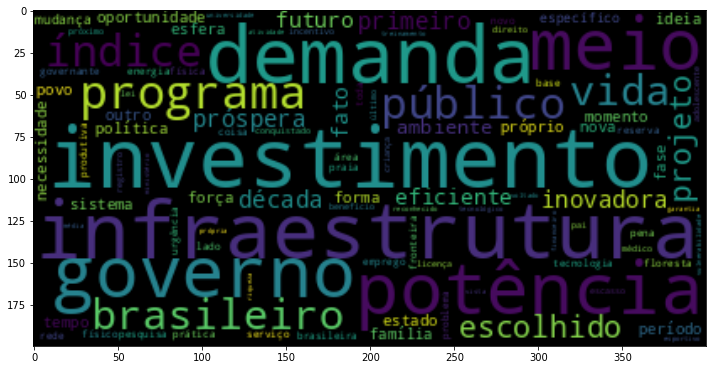

In [ ]:
wordcloud = WordCloud(background_color="black").generate(all_tokensPROS)

# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()